In [1]:
# !pip install scikit-optimize

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Classification
import lightgbm as lgbm
import xgboost as xg

# Metric
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics

# Seacrh 
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [3]:
train = pd.read_csv('/content/data/train.csv')
test = pd.read_csv('/content/data/test.csv')

In [4]:
# train.head()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [6]:
corr = train.corr()

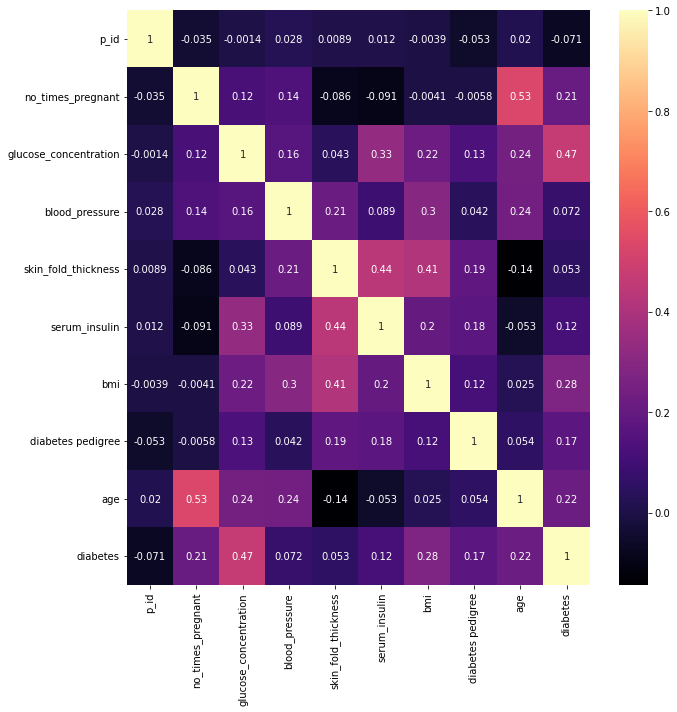

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap='magma', annot=True)
plt.tight_layout()

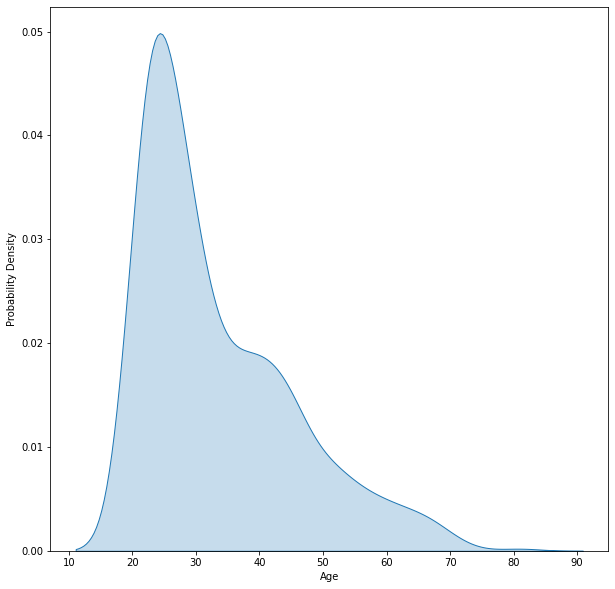

In [8]:
plt.figure(figsize=(10,10))
sns.kdeplot(train['age'], shade=True, Label="Age")
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.show()

In [9]:
train['diabetes'].value_counts()

0    400
1    214
Name: diabetes, dtype: int64

In [10]:
# train.loc[train.diabetes == 1, 'age'].value_counts()

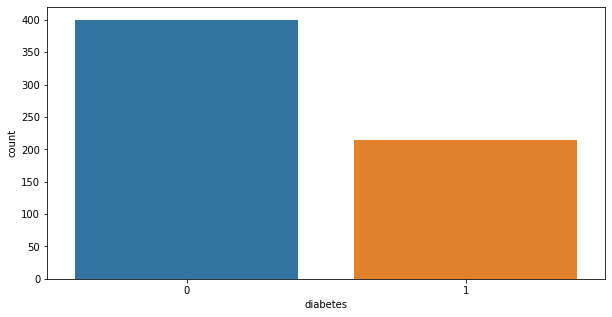

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='diabetes', data=train)
plt.show()

In [12]:
highest_corr_features = corr.index[abs(corr["diabetes"])>0.2]

In [13]:
X = train.drop(['diabetes', 'p_id'], axis=1)
y = train['diabetes']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=7)

In [14]:
params_search = {
    'max_depth': Integer(1, 10),
    # 'bagging_freq': Integer(1, 40), 
    # 'bagging_fraction': Real(0.5, 0.99),
    'n_estimators': Integer(50, 1000),
    'learning_rate': Real(0.0001, 0.99),

    'boosting_type': Categorical(['dart', 'gbdt', 'goss']), 
    'objective': Categorical(['regression_l1', 'regression_l2', 'regression']),
  }

In [15]:
# %%time
# model = lgbm.LGBMClassifier()
# model.fit(X_train, y_train)

# cv = KFold(n_splits=5)
# opt = BayesSearchCV(model, params_search, cv=cv, scoring='f1')
# opt.fit(X_train, y_train)

In [16]:
# cv_results = pd.DataFrame(opt.cv_results_)
# cv_results.to_csv('params.csv')

In [17]:
# cv_results = pd.read_csv('/content/params.csv')
# cv_results = cv_results.sort_values('rank_test_score', ascending=True)

In [18]:
# params = cv_results.iloc[-1]['params']

In [19]:
# params

In [20]:
params = {
    'boosting_type':'gbdt', 
    'learning_rate' : 0.0496309207068068,
    'max_depth': 2, 
    'n_estimators': 111, 
    'objective': 'regression'
}

In [21]:
def acc(y_test, y_pred):
  accuracy = metrics.accuracy_score(y_test, y_pred)
  f1 =  metrics.f1_score(y_test, y_pred)
  aps = metrics.average_precision_score(y_test, y_pred)
  log_loss = metrics.log_loss(y_test, y_pred)
  precission =  metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  ROC_AUC =  metrics.roc_auc_score(y_test, y_pred)
  return accuracy, precission, recall, ROC_AUC

In [22]:
model = lgbm.LGBMClassifier(**params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [23]:
accuracy, precission, recall, ROC_AUC = acc(y_test, y_pred)
print('Test accuracy: %.8f' % accuracy)
print('Test precission: %.8f' % precission)
print('Test Recall: %.8f' % recall)
print('Test ROC AUC score: %.8f' % ROC_AUC)
print('\n')

Test accuracy: 0.79870130
Test precission: 0.81578947
Test Recall: 0.56363636
Test ROC AUC score: 0.74646465


